In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm

df = pd.read_csv("amazon_sales_dataset.csv")
#Dataset derived from https://data.world/revanthkrishnaa/amazon-uk-sales-forecasting-2018-2021

df.head()


,Date,Store,Dept,Unnamed: 3,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,...,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
0,05/02/2019,1,1,05/02/2019,24924.50,A,151315,42.31,2.572,211.096358,...,0,2019,2,5,57592.12,14537.37,22513.322940,18535.48,9854.349032,0.0
1,05/02/2019,9,97,05/02/2019,668.48,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
2,05/02/2019,9,85,05/02/2019,693.87,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
3,05/02/2019,8,80,05/02/2019,8654.60,A,155078,34.14,2.572,214.471451,...,0,2019,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
4,05/02/2019,9,55,05/02/2019,11123.56,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


In [30]:
# Check for missing values
print(df.isnull().sum())

Date              0
Store             0
Dept              0
Unnamed: 3        0
Weekly_Sales      0
Type              0
Size              0
Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
IsHoliday         0
Year              0
Month             0
Week              0
max               0
min               0
mean              0
median            0
std               0
Total_MarkDown    0
dtype: int64


In [31]:
#Just in case lol
df = df.dropna()

In [32]:
print(df)

              Date  Store  Dept  Unnamed: 3  Weekly_Sales Type    Size  \
0       05/02/2019      1     1  05/02/2019      24924.50    A  151315   
1       05/02/2019      9    97  05/02/2019        668.48    B  125833   
2       05/02/2019      9    85  05/02/2019        693.87    B  125833   
3       05/02/2019      8    80  05/02/2019       8654.60    A  155078   
4       05/02/2019      9    55  05/02/2019      11123.56    B  125833   
...            ...    ...   ...         ...           ...  ...     ...   
374242  26/10/2021      2    26  26/10/2021       9258.88    A  202307   
374243  26/10/2021     38    23  26/10/2021         53.12    C   39690   
374244  26/10/2021     27     6  26/10/2021       5339.65    A  204184   
374245  26/10/2021     36    40  26/10/2021      10216.27    A   39910   
374246  26/10/2021     45    98  26/10/2021       1076.80    B  118221   

        Temperature  Fuel_Price         CPI  ...  IsHoliday  Year  Month  \
0             42.31       2.572  21

In [33]:
#Checking for duplicated values
print(df.duplicated().sum())

0


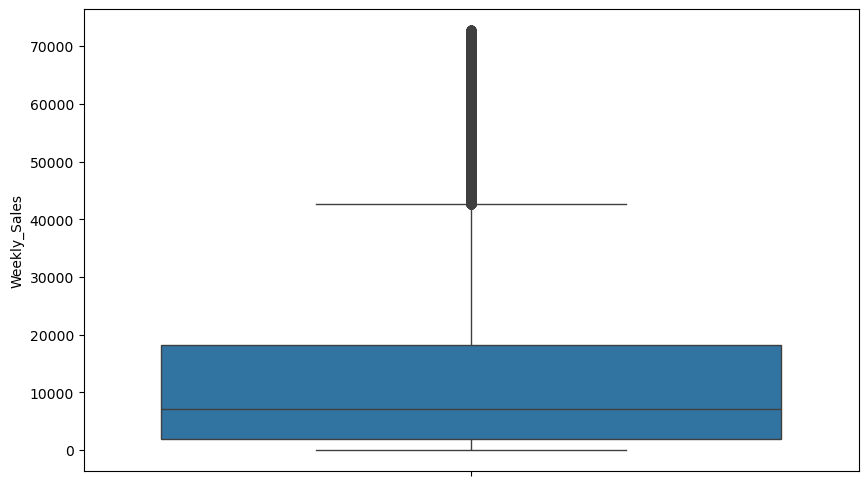

In [34]:
#Checking for extreme outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df['Weekly_Sales'])
plt.show()

In [35]:
# Feature engineering for weekly sales data
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Create lagged values for Weekly_Sales (previous week's sales)
df['Weekly_Sales_lag1'] = df['Weekly_Sales'].shift(1)

# Create a rolling average over 4 weeks (1 month)
df['Weekly_Sales_rolling4'] = df['Weekly_Sales'].rolling(window=4).mean()

# Drop any NaN values created by shifting/rolling operations
df = df.dropna()
df.head()

,Date,Store,Dept,Unnamed: 3,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,...,Month,Week,max,min,mean,median,std,Total_MarkDown,Weekly_Sales_lag1,Weekly_Sales_rolling4
3,2019-05-02,8,80,05/02/2019,8654.60,A,155078,34.14,2.572,214.471451,...,5.0,18,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0,693.87,8735.3625
4,2019-05-02,9,55,05/02/2019,11123.56,B,125833,38.01,2.572,214.655459,...,5.0,18,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0,8654.60,5285.1275
5,2019-05-02,9,52,05/02/2019,1150.25,B,125833,38.01,2.572,214.655459,...,5.0,18,3490.13,722.87,1672.207133,1617.34,428.654013,0.0,11123.56,5405.5700
6,2019-05-02,9,28,05/02/2019,356.90,B,125833,38.01,2.572,214.655459,...,5.0,18,600.40,67.59,246.345664,236.30,102.989045,0.0,1150.25,5321.3275
7,2019-05-02,9,29,05/02/2019,2604.70,B,125833,38.01,2.572,214.655459,...,5.0,18,5577.07,1001.74,1919.389231,1814.04,589.453310,0.0,356.90,3808.8525


In [36]:
X = df[['Year', 'Month', 'Weekly_Sales_lag1', 'Weekly_Sales_rolling4']]
y = df['Weekly_Sales']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR' : SVR()
}

results = {}

In [37]:

#for name, model in models.items():
    # Fit the model
 #   model.fit(X_train, y_train)
    
    # Predict on test set
  #  y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
   # mae = mean_absolute_error(y_test, y_pred)
    #rmse = np.sqrt(mean_squared_error(y_test, y_pred))
   # r2 = r2_score(y_test, y_pred)
    
    # Store results
 #   results[name] = {
  #      'MAE': mae,
   #     'RMSE': rmse,
    #    'R^2': r2
   # }

#print(f"Model: {name}")
#print(f"Mean Absolute Error (MAE): {mae}")
#print(f"Root Mean Squared Error (RMSE): {rmse}")
#print(f"R^2 Score: {r2}")
#print('-' * 30)


# Above could not run due to computational resources. Will run each individually.

Starting Linear Regression...
Linear Regression - MAE: 9244.216077187048, RMSE: 12613.44653702671, R^2: 0.33185977611012274


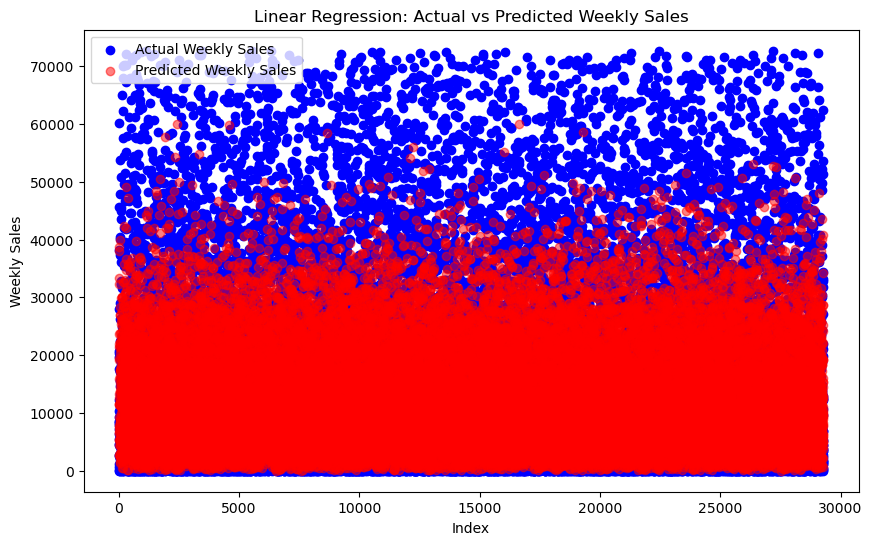

In [39]:
# Linear Regression
print("Starting Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}, R^2: {r2_lr}")

# Plotting
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Weekly Sales')
plt.scatter(range(len(y_pred_lr)), y_pred_lr, color='red', alpha=0.5, label='Predicted Weekly Sales')
plt.title('Linear Regression: Actual vs Predicted Weekly Sales')
plt.xlabel('Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()



In [40]:
conf_matrix_linreg = confusion_matrix(y_test, y_pred_linreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Linear Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

NameError: name 'y_pred_logreg' is not defined

Starting Decision Tree...
Decision Tree - MAE: 12204.429274496417, RMSE: 18019.197407751755, R^2: -0.3635496716606561


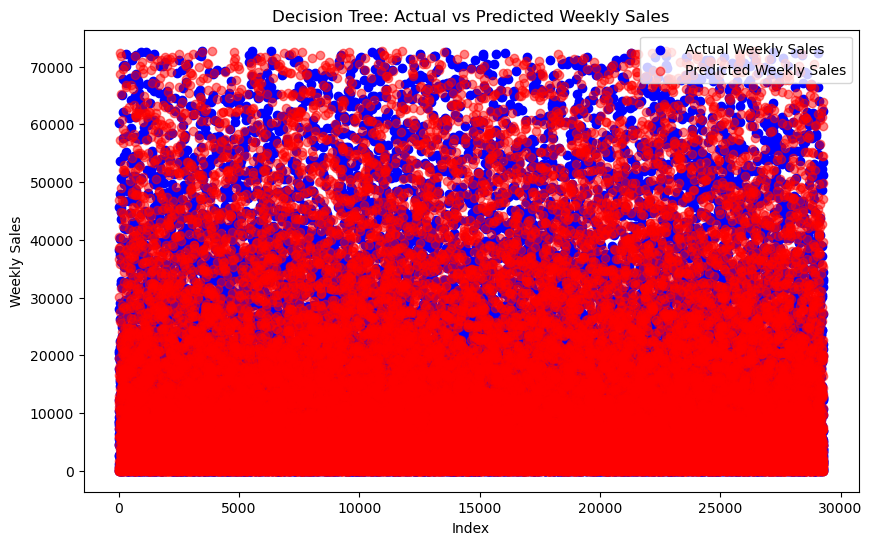

In [42]:
# Decision Tree
print("Starting Decision Tree...")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - MAE: {mae_dt}, RMSE: {rmse_dt}, R^2: {r2_dt}")

# Plotting
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Weekly Sales')
plt.scatter(range(len(y_pred_dt)), y_pred_dt, color='red', alpha=0.5, label='Predicted Weekly Sales')
plt.title('Decision Tree: Actual vs Predicted Weekly Sales')
plt.xlabel('Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [ ]:
conf_matrix_dectreereg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Random Forest
print("Starting Random Forest...")
rf_model = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R^2: {r2_rf}")

# Plotting
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Weekly Sales')
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='red', alpha=0.5, label='Predicted Weekly Sales')
plt.title('Random Forest: Actual vs Predicted Weekly Sales')
plt.xlabel('Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [ ]:
conf_matrix_rfreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Support Vector Regression
print("Starting SVR...")
svr_model = SVR(kernel='linear')  # Linear kernel for simplicity
svr_model.fit(X_train, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluation
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - MAE: {mae_svr}, RMSE: {rmse_svr}, R^2: {r2_svr}")

# Plotting
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Weekly Sales')
plt.scatter(range(len(y_pred_svr)), y_pred_svr, color='red', alpha=0.5, label='Predicted Weekly Sales')
plt.title('SVR: Actual vs Predicted Weekly Sales')
plt.xlabel('Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# SVR beyond computational capability

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Creating target variable for classification: Increase (1) or Decrease (0)
df['Sales_Change'] = np.where(df['Weekly_Sales'].diff() > 0, 1, 0)

# Features and target
X = df[['Year', 'Month', 'Weekly_Sales_lag1', 'Weekly_Sales_rolling4']]
y = df['Sales_Change']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_logreg = log_reg.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Accuracy and Classification Report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# Accuracy and Classification Report
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:

# For clustering, use the same features (without the target)
X_clustering = df[['Year', 'Month', 'Weekly_Sales_lag1', 'Weekly_Sales_rolling4']]

# Standardize the features for clustering
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_clustering_pca = pca.fit_transform(X_clustering_scaled)

# Clustering Models

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_clustering_scaled)
df['KMeans_Cluster'] = clusters_kmeans

# Plotting KMeans clusters
plt.scatter(X_clustering_pca[:, 0], X_clustering_pca[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title("KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()